In [1]:
import sys
import os

# 1. Lấy đường dẫn tuyệt đối của thư mục hiện tại (notebooks)
current_dir = os.getcwd()

# 2. Lấy đường dẫn của thư mục cha (MODELS)
project_root = os.path.dirname(current_dir)

# 3. Thêm thư mục cha vào hệ thống tìm kiếm module của Python
if project_root not in sys.path:
    sys.path.append(project_root)

# Kiểm tra xem đã thêm đúng chưa (Optional)
print(f"Project Root added: {project_root}")
from models.utils.loader import *
from models.utils.visualize import *
from models.metrics import *
from models.softmax_regression import *
from models.model_pixel import PixelSoftmax
from models.model_edge import EdgeSoftmax
from models.model_pca import PCASoftmax
from models.model_block import BlockSoftmax
from models.model_hog import HOGSoftmax
from models.softmax_regression import SoftmaxRegression

Project Root added: d:\Coding\School\Y3-K1\Intro2ML\Lab 2 - Softmax  Regression\src\Intro2ML-Lab02-SoftmaxRegression\MODELS


In [2]:
def data_splitter(X: np.ndarray, y: np.ndarray, val_ratio: float = 0.2):
    """
    Split the dataset into training and validation sets.
    """
    num_samples = X.shape[0]
    num_val = int(num_samples * val_ratio)
    
    X_train = X[:-num_val]
    y_train = y[:-num_val]
    X_val = X[-num_val:]
    y_val = y[-num_val:]
    
    return X_train, y_train, X_val, y_val

Output()

Epoch 1/10 - Validation Accuracy: 73.89%

Epoch 2/10 - Validation Accuracy: 74.13%

Epoch 3/10 - Validation Accuracy: 74.30%

Epoch 4/10 - Validation Accuracy: 74.49%

Epoch 5/10 - Validation Accuracy: 74.70%

Epoch 6/10 - Validation Accuracy: 74.90%

Epoch 7/10 - Validation Accuracy: 75.15%

Epoch 8/10 - Validation Accuracy: 75.54%

Epoch 9/10 - Validation Accuracy: 75.81%

Epoch 10/10 - Validation Accuracy: 76.02%

Accuracy: 0.7634


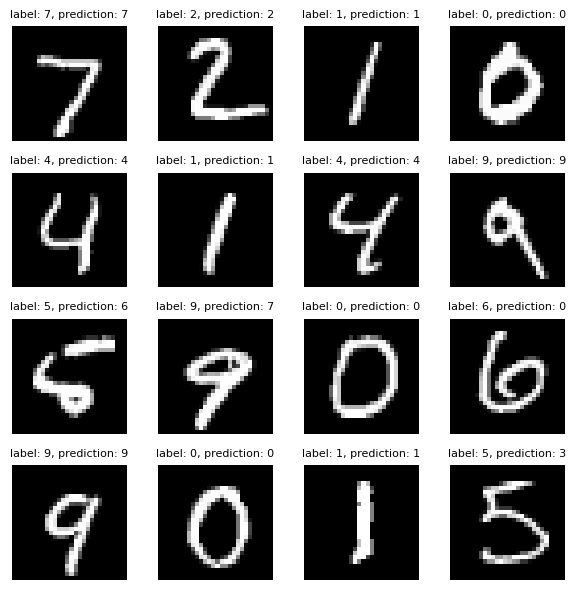

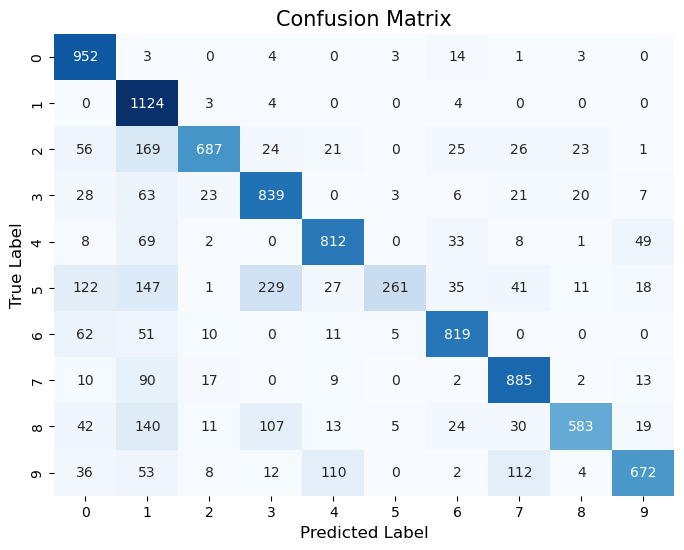

In [ ]:
datapath = os.path.join(project_root, 'data/mnist_data.npz')
X_train, y_train, X_test, y_test = load_dataset(datapath)

model = PCASoftmax(50, 10)

X_train, y_train, X_val, y_val = data_splitter(X_train, y_train, val_ratio=0.2)

model.fit(X_train.reshape(X_train.shape[0], -1), y_train, X_val =  X_val.reshape(X_val.shape[0], -1), y_val = y_val, learning_rate=0.1, epochs=100, verbose=True, batch_size=X_train.shape[0])

y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

print(f"Accuracy: {accuracy(y_pred, y_test)}")

plt.figure(figsize=(6,6))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f'label: {y_test[i]}, prediction: {y_pred[i]}', fontsize=8)

plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred, num_classes=10)

plot_confusion_matrix(cm, range(10))

10 10


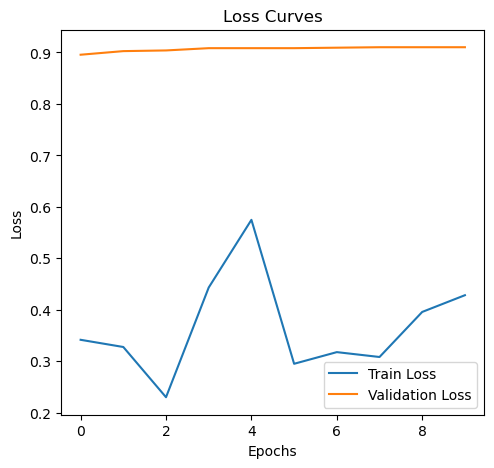

In [4]:
import matplotlib.pyplot as plt

# shot loss and accuracy curves
print(len(model.loss_history), len(model.acc_history))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(model.loss_history, label='Train Loss')
plt.plot(model.acc_history, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()